In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    "x" : [12,20,28,18,29,33,24,45,45,52,51,53,52,55,61,64,69,72],
    "y" : [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7],
})

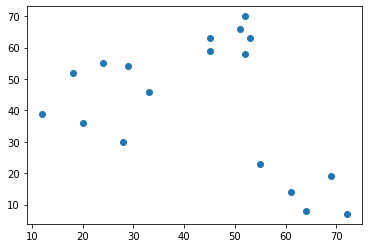

In [3]:
plt.scatter(df['x'], df['y'])

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [5]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
print('Labels -> {}\nCentroids -> {}'.format(labels, centroids))

Labels -> [1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0]
Centroids -> [[64.2        14.2       ]
 [23.42857143 44.57142857]
 [49.66666667 63.16666667]]


No handles with labels found to put in legend.


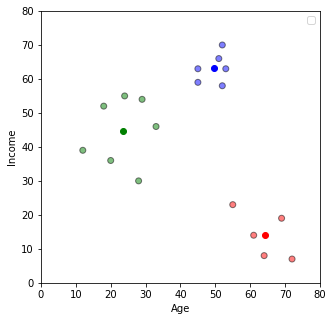

In [6]:
colmap = {1:'r', 2:'g', 3:'b'}
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1  = list(colors)

plt.scatter(df['x'],df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1], d)
plt.xlabel("Age")
plt.ylabel("Income")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.show()

In [11]:
colors1

['g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r']

### Find Elbow Method

In [7]:
k_rng = range(1,10)    # k_range is bassically no. of K is k = 1,2,3,4,5,6,7,8,9
sse =[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)

In [8]:
sse

[13210.5,
 4764.5230769230775,
 1423.195238095238,
 880.5166666666667,
 677.9166666666667,
 549.2500000000001,
 445.0,
 342.16666666666663,
 252.16666666666663]

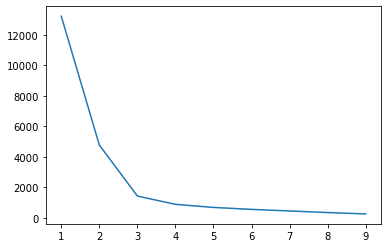

In [9]:
plt.plot(k_rng, sse)